In [1]:
!pip install --upgrade cptac

Requirement already up-to-date: cptac in c:\users\chels\anaconda3\lib\site-packages (0.8.0)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cptac
import pyensembl
from scipy import stats

In [3]:
luad_all_genes = ['AARD', 'ABRA', 'ANGPT1', 'ANKRD46', 'ANXA13', 'ASAP1', 'ATAD2', 'ATP6V0D2', 'ATP6V1C1', 'AZIN1', 'BAALC', 'C8orf37', 'C8orf76', 'C8orf88', 'CA1', 'CA13', 'CA2', 'CA3', 'CALB1', 'CCNE2', 'CDH17', 'CHMP4C', 'CNBD1', 'CNGB3', 'COL14A1', 'COLEC10', 'COX6C', 'CPNE3', 'CPQ', 'CSMD3', 'CTHRC1', 'DCAF13', 'DCAF4L2', 'DCSTAMP', 'DECR1', 'DEPTOR', 'DERL1', 'DPY19L4', 'DPYS', 'DSCC1', 'E2F5', 'EBAG9', 'EIF3E', 'EIF3H', 'EMC2', 'ENPP2', 'ENY2', 'ERICH5', 'ESRP1', 'EXT1', 'FABP12', 'FABP4', 'FABP5', 'FABP9', 'FAM49B', 'FAM83A', 'FAM91A1', 'FAM92A', 'FBXO32', 'FBXO43', 'FER1L6', 'FSBP', 'FZD6', 'GDF6', 'GEM', 'GRHL2', 'GSDMC', 'HAS2', 'IMPA1', 'INTS8', 'KCNS2', 'KCNV1', 'KLF10', 'KLHL38', 'LAPTM4B', 'LRP12', 'LRRC69', 'LRRCC1', 'MAL2', 'MATN2', 'MED30', 'MMP16', 'MRPL13', 'MTBP', 'MTDH', 'MTERF3', 'MTSS1', 'MYC', 'NBN', 'NCALD', 'NDUFAF6', 'NDUFB9', 'NECAB1', 'NIPAL2', 'NSMCE2', 'NUDCD1', 'ODF1', 'OSGIN2', 'OSR2', 'OTUD6B', 'OXR1', 'PABPC1', 'PAG1', 'PDP1', 'PKHD1L1', 'PLEKHF2', 'PMP2', 'POLR2K', 'POP1', 'POU5F1B', 'PSKH2', 'PTDSS1', 'RAD21', 'RAD54B', 'RALYL', 'RBM12B', 'RGS22', 'RIDA', 'RIMS2', 'RIPK2', 'RMDN1', 'RNF139', 'RNF19A', 'RPL30', 'RRM2B', 'RSPO2', 'RUNX1T1', 'SAMD12', 'SDC2', 'SLC10A5', 'SLC25A32', 'SLC26A7', 'SLC30A8', 'SLC7A13', 'SNTB1', 'SNX16', 'SNX31', 'SPAG1', 'SQLE', 'STK3', 'SYBU', 'TAF2', 'TATDN1', 'TBC1D31', 'TMEM64', 'TMEM65', 'TMEM67', 'TMEM74', 'TNFRSF11B', 'TP53INP1', 'TRHR', 'TRIB1', 'TRIQK', 'TRMT12', 'TRPS1', 'TSPYL5', 'UBR5', 'UQCRB', 'UTP23', 'VPS13B', 'WASHC5', 'WDYHV1', 'WWP1', 'YWHAZ', 'ZFAND1', 'ZFPM2', 'ZHX1', 'ZHX2', 'ZNF572', 'ZNF706']

In [4]:
def intersection(lst1, lst2): 
  
    # Use of hybrid method 
    temp = set(lst2) 
    lst3 = [value for value in lst1 if value in temp] 
    return lst3 

## LUAD

In [5]:
cptac.download(dataset="luad")
luad = cptac.Luad()
luad_cnv = luad.get_CNV()
luad_prot = luad.get_proteomics()

cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py, line 2)


In [6]:
luad_cnv_event = luad_cnv[genes]
luad_cnv_event['avg'] = luad_cnv_event.apply(np.average, axis=1)

C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
luad_avgs = luad_cnv_event[['avg']]

In [8]:
luad_genes = ['FAM91A1', 'NUDCD1', 'PHF20L1', 'RBM12B']

In [9]:
luad_proteins = luad_prot[luad_genes]

In [10]:
luad_proteins.columns = luad_proteins.columns.droplevel(1)

In [11]:
luad_table = luad_proteins.join(luad_avgs)

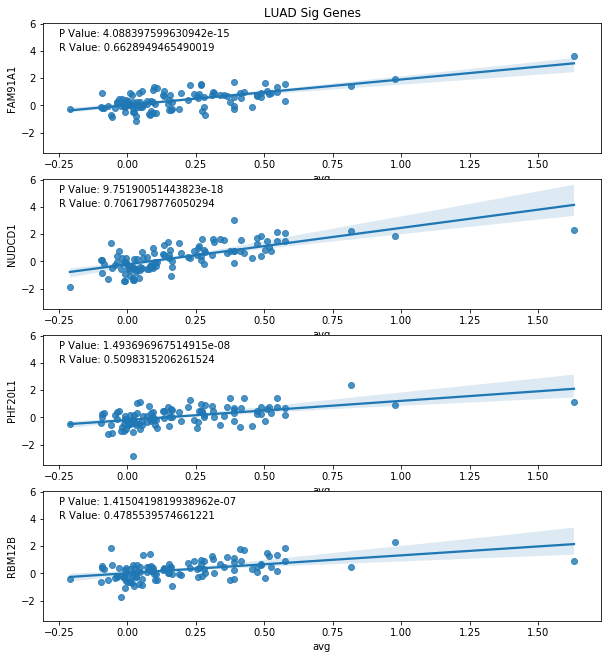

In [87]:
fig, axs = plt.subplots(nrows=4, num=0, sharey=True, figsize=(10,11))
fig.suptitle("LUAD Sig Genes", y=0.9, x=0.5)
count = 0
for gene in luad_genes:
    t = luad_table[['avg', gene]]
    t = t.dropna()
    results = stats.linregress(t['avg'], t[gene])
    axs[count].text(-0.25, 5, f'P Value: {results.pvalue}')
    axs[count].text(-0.25, 4, f'R Value: {results.rvalue}')
    sns.regplot(x='avg', y=gene, data=luad_table, ax=axs[count])
    count += 1

## OVARIAN

In [13]:
cptac.download(dataset="ovarian")
ovarian = cptac.Ovarian()
ovarian_cnv = ovarian.get_CNV()
ovarian_prot = ovarian.get_proteomics()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [14]:
ovarian_prot.loc[:,ovarian_prot.columns.get_level_values(0).str.startswith('RID')]

Name,RIDA
Database_ID,NP_005827
Patient_ID,
01OV007,-0.705542
01OV017,-0.687581
01OV018,-0.627755
01OV023,0.243714
01OV026,-0.253195
...,...
17OV001.N,-0.891837
17OV002.N,-0.148060


In [15]:
ovarian_cnv_event = ovarian_cnv[intersection(genes, ovarian_cnv.columns.get_level_values(0))]
ovarian_cnv_event['avg'] = ovarian_cnv_event.apply(np.average, axis=1)
ovarian_cnv_event['std'] = ovarian_cnv_event.apply(np.std, axis=1)

C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
np.average(ovarian_cnv_event['std'])

0.16992137160672718

In [17]:
ovarian_avgs = ovarian_cnv_event[['avg']]

In [18]:
ovarian_genes = ['POP1', 'YWHAZ']

In [19]:
ovarian_proteins = ovarian_prot[ovarian_genes]
ovarian_proteins.columns = ovarian_proteins.columns.droplevel(1)

In [20]:
ovarian_proteins

Name,POP1,YWHAZ
Patient_ID,,
01OV007,-0.262603,0.172355
01OV017,-0.553553,-0.027032
01OV018,-0.045859,0.286620
01OV023,0.617097,0.179683
01OV026,-0.071496,0.436645
...,...,...
17OV001.N,-0.267092,0.163661
17OV002.N,0.206687,-0.496303
17OV003.N,0.666753,-0.273717


In [21]:
ovarian_table = ovarian_proteins.join(ovarian_avgs)

In [22]:
ovarian_table

Name,POP1,YWHAZ,avg
Patient_ID,,,
01OV007,-0.262603,0.172355,0.024400
01OV017,-0.553553,-0.027032,0.139129
01OV018,-0.045859,0.286620,0.024744
01OV023,0.617097,0.179683,0.519519
01OV026,-0.071496,0.436645,0.434766
...,...,...,...
17OV001.N,-0.267092,0.163661,NaN
17OV002.N,0.206687,-0.496303,NaN
17OV003.N,0.666753,-0.273717,NaN


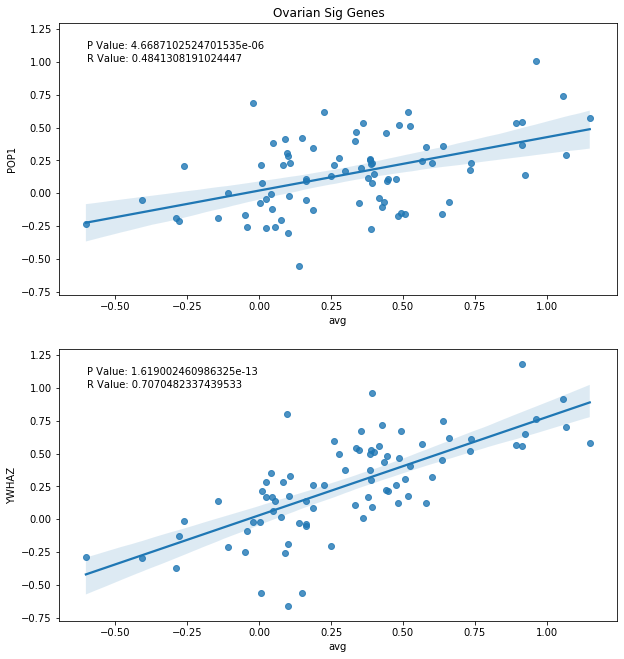

In [23]:
fig, axs = plt.subplots(nrows=len(ovarian_genes), num=0, sharey=True, figsize=(10,11))
fig.suptitle("Ovarian Sig Genes", y=0.9, x=0.5)
count = 0
for gene in ovarian_genes:
    t = ovarian_table[['avg', gene]]
    t = t.dropna()
    results = stats.linregress(t['avg'], t[gene])
    axs[count].text(-0.6, 1.1, f'P Value: {results.pvalue}')
    axs[count].text(-0.6, 1, f'R Value: {results.rvalue}')
    sns.regplot(x='avg', y=gene, data=ovarian_table, ax=axs[count])
    count += 1

## BRCA

In [24]:
cptac.download(dataset="brca")
brca = cptac.Brca()
brca_cnv = brca.get_CNV()
brca_prot = brca.get_proteomics()

In [25]:
brca_cnv_event = brca_cnv[intersection(genes, brca_cnv.columns.get_level_values(0))]
brca_cnv_event['avg'] = brca_cnv_event.apply(np.average, axis=1)
brca_cnv_event['std'] = brca_cnv_event.apply(np.std, axis=1)

C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
np.average(brca_cnv_event['std'])

0.18038620427265067

In [27]:
brca_avgs = brca_cnv_event[['avg']]

In [28]:
brca_avgs.columns = brca_avgs.columns.droplevel(1)

In [29]:
brca_genes = ['HSF1', 'OTUD6B', 'ZNF706']

In [30]:
brca_proteins = brca_prot[brca_genes]
brca_proteins.columns = brca_proteins.columns.droplevel(1)

In [31]:
brca_table = brca_proteins.join(brca_avgs)

In [32]:
brca_table

Name,HSF1,OTUD6B,ZNF706,avg
Patient_ID,,,,
CPT000814,-1.2895,0.4949,-1.7650,0.440268
CPT001846,-0.9596,-0.2765,-3.1204,0.345494
X01BR001,0.2648,0.7003,0.2818,1.219848
X01BR008,-0.4604,0.1094,0.8187,0.417488
X01BR009,1.7796,0.3516,1.5073,2.121524
...,...,...,...,...
X21BR001,0.5793,-1.1369,0.5507,0.608445
X21BR002,-1.2501,-1.1293,-1.9748,-0.013305
X21BR010,-0.5632,-2.0579,-1.5623,0.012000


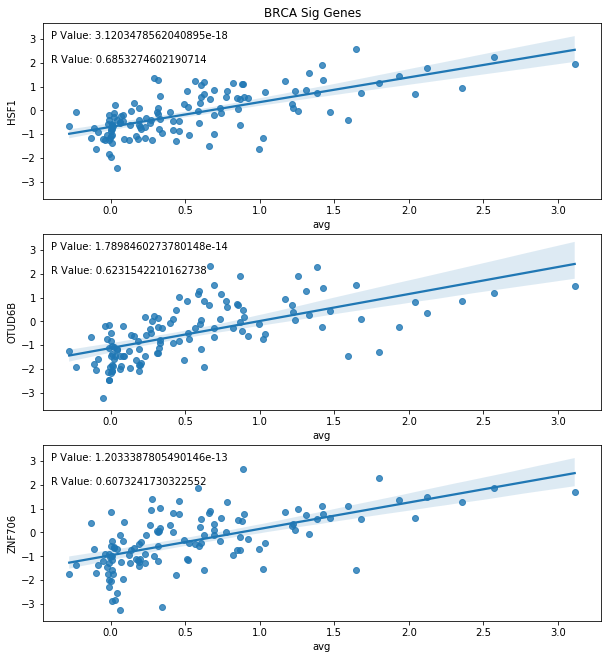

In [33]:
fig, axs = plt.subplots(nrows=len(brca_genes), num=0, sharey=True, figsize=(10,11))
fig.suptitle("BRCA Sig Genes", y=0.9, x=0.5)
count = 0
for gene in brca_genes:
    t = brca_table[['avg', gene]]
    t = t.dropna()
    results = stats.linregress(t['avg'], t[gene])
    axs[count].text(-0.4, 3, f'P Value: {results.pvalue}')
    axs[count].text(-0.4, 2, f'R Value: {results.rvalue}')
    sns.regplot(x='avg', y=gene, data=brca_table, ax=axs[count])
    count += 1

## COLON

In [34]:
cptac.download(dataset="colon")
colon = cptac.Colon()
colon_cnv = colon.get_CNV()
colon_prot = colon.get_proteomics()

In [35]:
colon_cnv_event = colon_cnv[intersection(genes, colon_cnv.columns.get_level_values(0))]
colon_cnv_event['avg'] = colon_cnv_event.apply(np.average, axis=1)
colon_cnv_event['std'] = colon_cnv_event.apply(np.std, axis=1)

C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
np.average(colon_cnv_event['std'])

0.08472545280418808

In [37]:
colon_avgs = colon_cnv_event[['avg']]

In [38]:
# colon_avgs.columns = colon_avgs.columns.droplevel(1)

In [39]:
colon_genes = ['C8orf82', 'RIDA']

In [40]:
colon_proteins = colon_prot[colon_genes]
# colon_proteins.columns = colon_proteins.columns.droplevel(1)

In [41]:
colon_table = colon_proteins.join(colon_avgs)

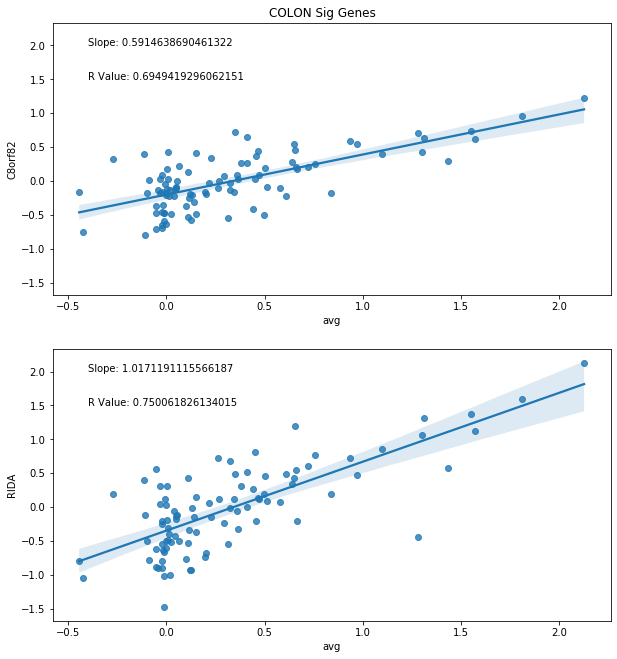

In [89]:
fig, axs = plt.subplots(nrows=len(colon_genes), num=0, sharey=True, figsize=(10,11))
fig.suptitle("COLON Sig Genes", y=0.9, x=0.5)
count = 0
for gene in colon_genes:
    t = colon_table[['avg', gene]]
    t = t.dropna()
    results = stats.linregress(t['avg'], t[gene])
    axs[count].text(-0.4, 2, f'Slope: {results.slope}')
    axs[count].text(-0.4, 1.5, f'R Value: {results.rvalue}')
    sns.regplot(x='avg', y=gene, data=colon_table, ax=axs[count])
    count += 1

## LSCC

In [43]:
cptac.download(dataset="lscc")
lscc = cptac.Lscc()
lscc_cnv = lscc.get_CNV()
lscc_prot = lscc.get_proteomics()

cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py, line 2)


In [44]:
lscc_cnv_event = lscc_cnv[intersection(genes, lscc_cnv.columns.get_level_values(0))]
lscc_cnv_event['avg'] = lscc_cnv_event.apply(np.average, axis=1)
lscc_cnv_event['std'] = lscc_cnv_event.apply(np.std, axis=1)

C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
np.average(lscc_cnv_event['std'])

0.07051315295199884

In [46]:
lscc_avgs = lscc_cnv_event[['avg']]

In [47]:
# lscc_avgs.columns = lscc_avgs.columns.droplevel(1)

In [48]:
lscc_genes = ['OTUD6B', 'RIDA', 'STK3', 'TRIM38']

In [49]:
lscc_proteins = lscc_prot[lscc_genes]
lscc_proteins.columns = lscc_proteins.columns.droplevel(1)

In [50]:
lscc_table = lscc_proteins.join(lscc_avgs)

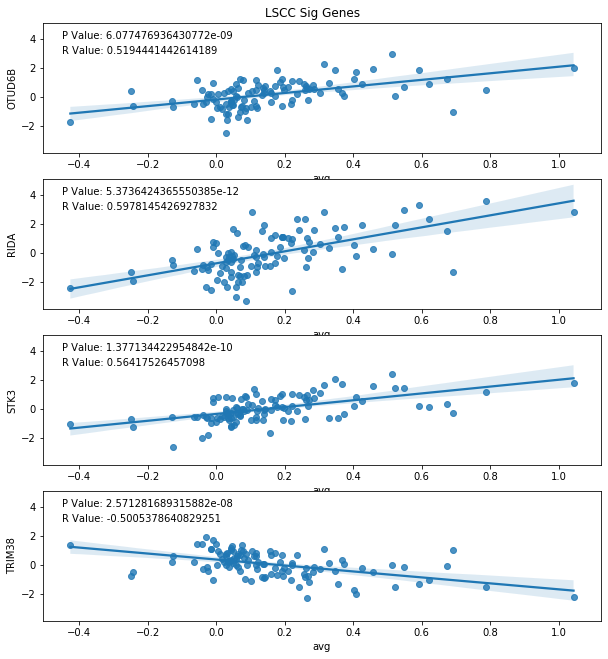

In [51]:
fig, axs = plt.subplots(nrows=len(lscc_genes), num=0, sharey=True, figsize=(10,11))
fig.suptitle("LSCC Sig Genes", y=0.9, x=0.5)
count = 0
for gene in lscc_genes:
    t = lscc_table[['avg', gene]]
    t = t.dropna()
    results = stats.linregress(t['avg'], t[gene])
    axs[count].text(-0.45, 4, f'P Value: {results.pvalue}')
    axs[count].text(-0.45, 3, f'R Value: {results.rvalue}')
    sns.regplot(x='avg', y=gene, data=lscc_table, ax=axs[count])
    count += 1

## HNSCC

In [52]:
cptac.download(dataset="hnscc")
hnscc = cptac.Hnscc()
hnscc_cnv = hnscc.get_CNV()
hnscc_prot = hnscc.get_proteomics()

cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py, line 2)


In [53]:
hnscc_cnv_event = hnscc_cnv[intersection(genes, hnscc_cnv.columns.get_level_values(0))]
hnscc_cnv_event['avg'] = hnscc_cnv_event.apply(np.average, axis=1)
hnscc_cnv_event['std'] = hnscc_cnv_event.apply(np.std, axis=1)

C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
np.average(hnscc_cnv_event['std'])

0.05377679042231196

In [55]:
hnscc_avgs = hnscc_cnv_event[['avg']]

In [56]:
# hnscc_avgs.columns = hnscc_avgs.columns.droplevel(1)

In [57]:
hnscc_genes = ['ESRP1', 'FZD6', 'MTFR1']

In [58]:
hnscc_proteins = hnscc_prot[hnscc_genes]
# hnscc_proteins.columns = hnscc_proteins.columns.droplevel(1)

In [59]:
hnscc_prot

Name,A1BG,A1CF,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AADAT,AAED1,...,ZSWIM9,ZW10,ZWILCH,ZWINT,ZXDA,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00977,27.725342,19.056377,28.565472,26.929429,NaN,24.217340,24.746903,21.413714,NaN,18.187642,...,NaN,24.739946,23.345919,19.219742,NaN,NaN,22.473319,27.870637,24.543298,20.070938
C3L-00987,28.152905,NaN,29.374443,27.872815,NaN,24.288701,24.731336,24.530248,NaN,NaN,...,NaN,24.575403,22.715326,NaN,NaN,19.438877,22.350913,27.694608,24.194437,17.471477
C3L-00994,28.348186,18.058554,30.252145,25.854580,NaN,24.150865,24.325959,21.295667,NaN,19.525432,...,NaN,24.531751,22.636623,19.005228,NaN,NaN,22.780357,28.117156,24.429272,20.055226
C3L-00995,28.004445,NaN,29.267877,28.182014,NaN,24.292617,24.878660,19.727526,NaN,18.660637,...,NaN,24.719581,22.475250,NaN,NaN,19.361772,22.385058,28.565526,24.713502,NaN
C3L-00997,27.735214,NaN,28.724642,26.751857,18.426501,24.348787,25.381833,21.636534,NaN,NaN,...,NaN,24.692211,23.130920,NaN,NaN,19.610571,22.782499,28.117587,24.374482,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-04275.N,27.708177,17.807197,29.184649,28.388298,NaN,24.222330,25.212769,23.148175,NaN,16.429385,...,NaN,24.599968,22.482026,18.412554,NaN,NaN,22.459153,27.464044,24.658842,18.625008
C3N-04276.N,29.521735,NaN,30.304624,28.794933,17.926236,24.061325,25.060691,23.596460,NaN,NaN,...,NaN,24.631897,22.543611,19.587623,NaN,19.156033,22.275892,27.561264,24.595373,NaN
C3N-04277.N,29.516238,NaN,31.029911,28.287798,NaN,24.216967,24.989632,24.160025,NaN,18.681249,...,NaN,24.681435,21.943179,NaN,NaN,19.536731,22.636691,27.705022,24.613596,20.226972


In [60]:
hnscc_table = hnscc_proteins.join(hnscc_avgs)

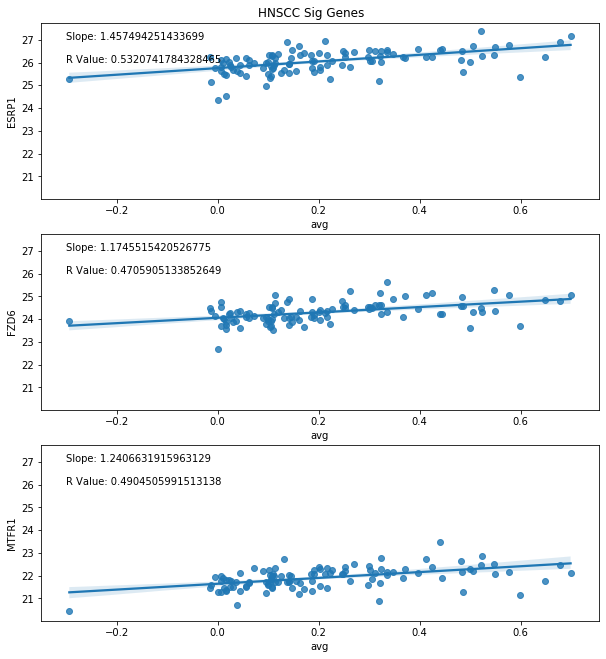

In [88]:
fig, axs = plt.subplots(nrows=len(hnscc_genes), num=0, sharey=True, figsize=(10,11))
fig.suptitle("HNSCC Sig Genes", y=0.9, x=0.5)
count = 0
for gene in hnscc_genes:
    t = hnscc_table[['avg', gene]]
    t = t.dropna()
    results = stats.linregress(t['avg'], t[gene])
    axs[count].text(-0.3, 27, f'Slope: {results.slope}')
    axs[count].text(-0.3, 26, f'R Value: {results.rvalue}')
    sns.regplot(x='avg', y=gene, data=hnscc_table, ax=axs[count], robust=True)
    count += 1

## All Cancer Types

In [62]:
all_genes = ['AGO2', 'PUF60', 'YTHDF3', 'PTK2', 'ESRP1', 'RRS1', 'DECR1', 'NUDCD1', 'CPNE3', 'LACTB2', 'C8orf82', 'RMDN1', 'SCRIB', 'POP1', 'YWHAZ', 'GGH', 'RIDA']

In [63]:
luad_all_proteins = luad_prot[all_genes]
ovarian_all_proteins = ovarian_prot[all_genes]
brca_all_proteins = brca_prot[all_genes]
colon_all_proteins = colon_prot[all_genes]
lscc_all_proteins = lscc_prot[all_genes]
hnscc_all_proteins = hnscc_prot[all_genes]

In [64]:
luad_all_proteins.columns = luad_all_proteins.columns.droplevel(1)
ovarian_all_proteins.columns = ovarian_all_proteins.columns.droplevel(1)
brca_all_proteins.columns = brca_all_proteins.columns.droplevel(1)
lscc_all_proteins.columns = lscc_all_proteins.columns.droplevel(1)

In [78]:
luad_all_table = luad_all_proteins.join(luad_avgs)
ovarian_all_table = ovarian_all_proteins.join(ovarian_avgs)
brca_all_table = brca_all_proteins.join(brca_avgs)
colon_all_table = colon_all_proteins.join(colon_avgs)
lscc_all_table = lscc_all_proteins.join(lscc_avgs)
hnscc_all_table = hnscc_all_proteins.join(hnscc_avgs)

In [79]:
luad_all_table = luad_all_table.loc[:,~luad_all_table.columns.duplicated()]
ovarian_all_table = ovarian_all_table.loc[:,~ovarian_all_table.columns.duplicated()]
brca_all_table = brca_all_table.loc[:,~brca_all_table.columns.duplicated()]
colon_all_table = colon_all_table.loc[:,~colon_all_table.columns.duplicated()]
lscc_all_table = lscc_all_table.loc[:,~lscc_all_table.columns.duplicated()]
hnscc_all_table = hnscc_all_table.loc[:,~hnscc_all_table.columns.duplicated()]

In [80]:
luad_table_melted = luad_all_table.melt(id_vars=['avg'], var_name="gene", value_name="prot")
luad_table_melted['cancer'] = 'LUAD'
ovarian_table_melted = ovarian_all_table.melt(id_vars=['avg'], var_name="gene", value_name="prot")
ovarian_table_melted['cancer'] = 'OVARIAN'
brca_table_melted = brca_all_table.melt(id_vars=['avg'], var_name="gene", value_name="prot")
brca_table_melted['cancer'] = 'BRCA'
colon_table_melted = colon_all_table.melt(id_vars=['avg'], var_name="gene", value_name="prot")
colon_table_melted['cancer'] = 'COLON'
lscc_table_melted = lscc_all_table.melt(id_vars=['avg'], var_name="gene", value_name="prot")
lscc_table_melted['cancer'] = 'LSCC'
hnscc_table_melted = hnscc_all_table.melt(id_vars=['avg'], var_name="gene", value_name="prot")
hnscc_table_melted['cancer'] = 'HNSCC'

In [83]:
tables = [luad_table_melted, ovarian_table_melted, brca_table_melted, colon_table_melted, lscc_table_melted]
all_tables = pd.concat(tables)

In [70]:
# tables = [luad_all_table, ovarian_all_table, brca_all_table, colon_all_table, lscc_all_table]
# all_tables = pd.concat(tables)

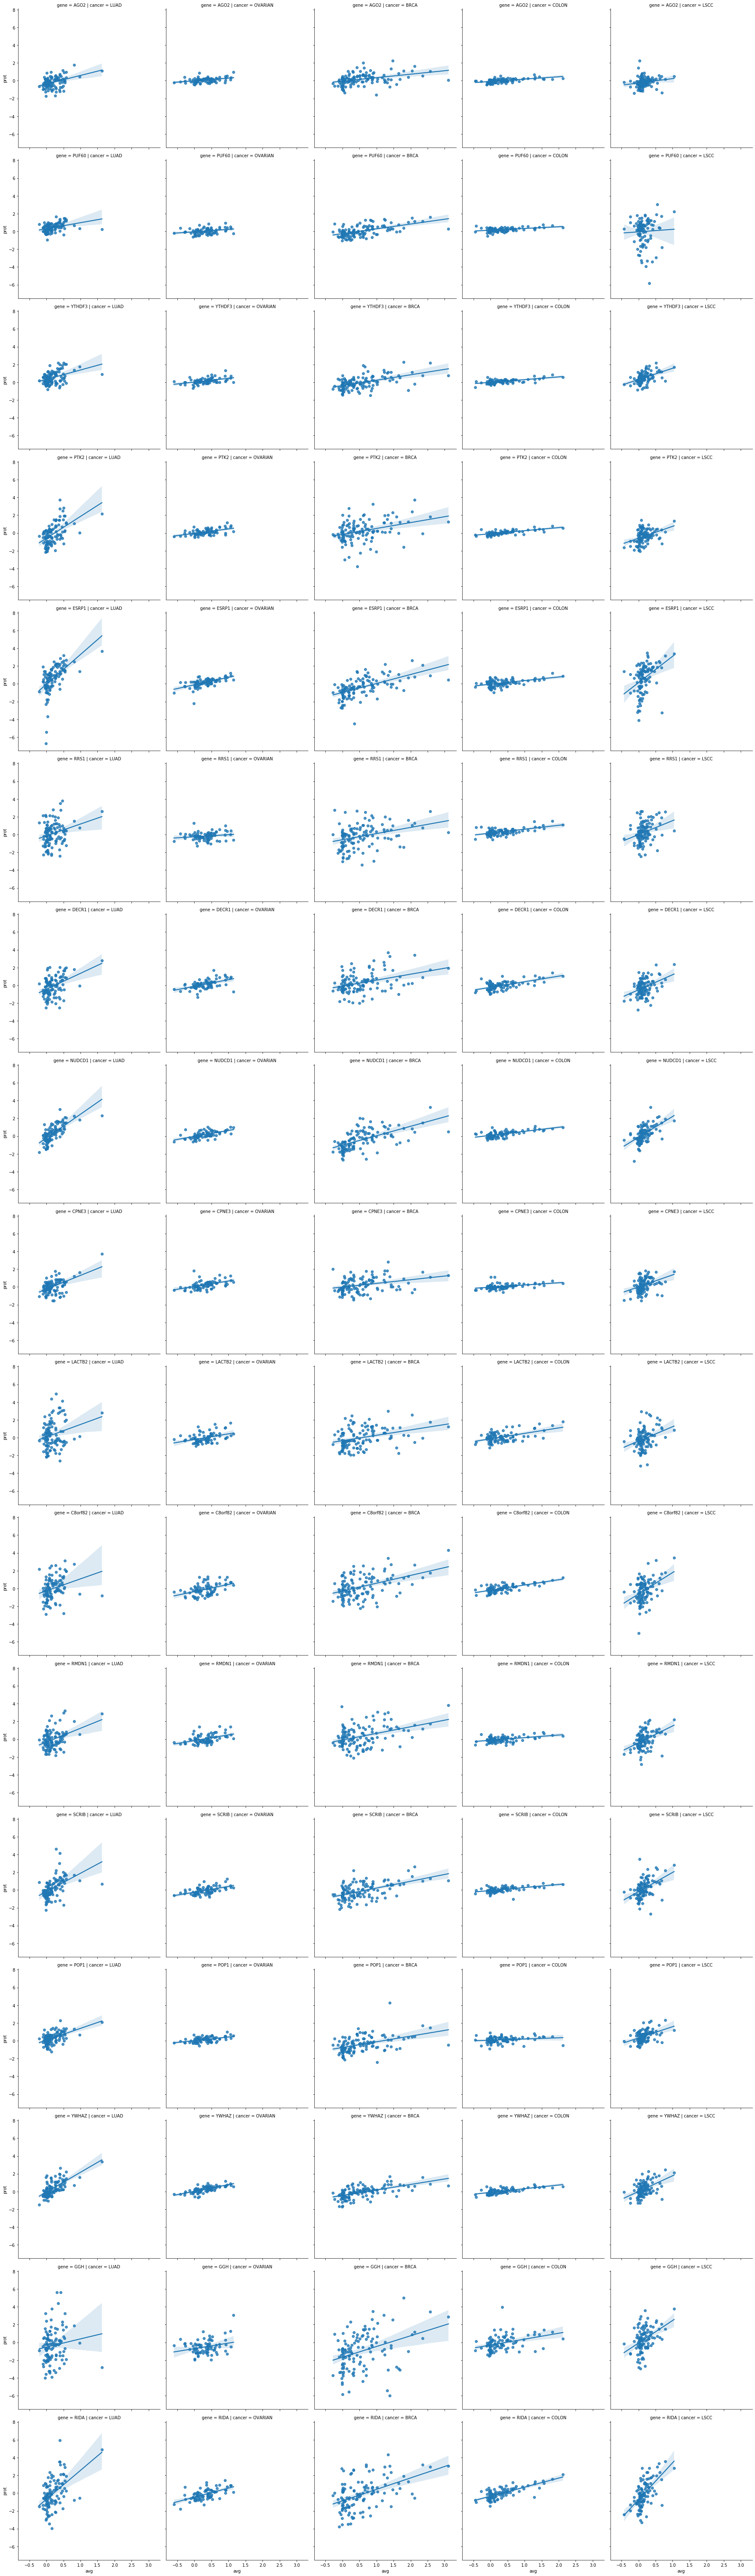

In [84]:
sns.lmplot(x='avg', y='prot',data=all_tables, row='gene', col='cancer')